## Name - NITESH KUMAR
### Batch-4

## Model Building

In [2]:
import pandas as pd

In [8]:
df=pd.read_csv("insurance_cleandata1.csv",)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# define Independent and dependent feature

In [10]:
X=df[["age","sex","bmi","children","smoker","region"]]

In [11]:
y=df[["charges"]]

In [12]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [13]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
# split train test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X.shape,X_train.shape

((1338, 6), (1070, 6))

In [17]:
y.shape,y_train.shape

((1338, 1), (1070, 1))

In [ ]:
## training the model by train data

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
regressor=LinearRegression()
svm=SVR()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

In [20]:
regressor.fit(X_train,y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_1493/3465132596.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [ ]:
# predict the data by using test data

In [21]:
y_test_pred1=regressor.predict(X_test)
y_test_pred2=svm.predict(X_test)
y_test_pred3=rf.predict(X_test)
y_test_pred4=gb.predict(X_test)


In [25]:
y_test.shape,y_test_pred1.shape,y_test_pred2.shape,y_test_pred3.shape,y_test_pred4.shape

((268, 1), (268, 1), (268,), (268,), (268,))

In [28]:
import pandas as pd

In [31]:
# for dataframe creation we have to ensure all the column should be in 1 d
y_test=y_test.flatten()
y_test_pred1=y_test_pred1.flatten()

In [37]:
df1=pd.DataFrame({"Actual":y_test,"regressor":y_test_pred1,"svm":y_test_pred2,"rf":y_test_pred3,"gb":y_test_pred4})

In [39]:
df1

,Actual,regressor,svm,rf,gb
0,9095.06825,8924.407244,9548.497618,11284.113539,11001.128629
1,5272.17580,7116.295018,9493.240235,5532.323453,5840.174656
2,29330.98315,36909.013521,9648.305149,28341.304525,28001.980112
3,9301.89355,9507.874691,9555.219911,11026.969253,9745.291602
4,33750.29180,27013.350008,9421.456253,34438.228472,33639.100981
...,...,...,...,...,...
263,47055.53210,39116.968669,9648.427941,46951.402855,45431.423211
264,12222.89830,11814.555568,9625.054566,12238.811107,12465.025294
265,6067.12675,7638.107736,9504.794628,6460.370754,6974.336525
266,63770.42801,40959.081722,9604.857687,46767.445403,47862.047791


In [35]:
import matplotlib.pyplot as plt

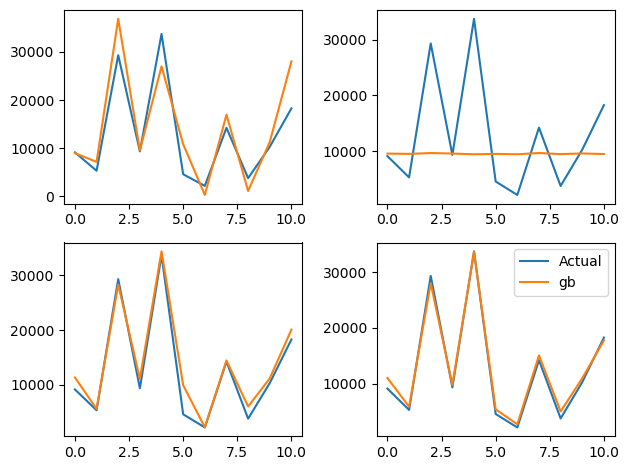

In [42]:
plt.subplot(221)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot (df1["regressor"].iloc[0:11],label="regressor")

plt.subplot(222)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot (df1["svm"].iloc[0:11],label="svm")

plt.subplot(223)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot (df1["rf"].iloc[0:11],label="rf")

plt.subplot(224)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot (df1["gb"].iloc[0:11],label="gb")

plt.tight_layout()
plt.legend()

# performance matrix

In [44]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [46]:
mse1=mean_squared_error(y_test,y_test_pred1)
mse2=mean_squared_error(y_test,y_test_pred2)
mse3=mean_squared_error(y_test,y_test_pred3)
mse4=mean_squared_error(y_test,y_test_pred4)


mae1=mean_absolute_error(y_test,y_test_pred1)
mae2=mean_absolute_error(y_test,y_test_pred2)
mae3=mean_absolute_error(y_test,y_test_pred3)
mae4=mean_absolute_error(y_test,y_test_pred4)

import numpy as np
rmse1=np.sqrt(mse1)
rmse2=np.sqrt(mse2)
rmse3=np.sqrt(mse3)
rmse4=np.sqrt(mse4)
print("mse value is :",mse1,mse2,mse3,mse4)
print("mae value is :",mae1,mae2,mae3,mae4)
print("rmse value is :", rmse1,rmse2,rmse3,rmse4)

mse value is : 33635210.431178406 166474492.543819 21069739.483425688 18941336.013983563
mae value is : 4186.508898366434 8592.792242831822 2483.7178401106353 2447.167158715136
rmse value is : 5799.587091438356 12902.499468855598 4590.1785894914465 4352.16452055567


# R squre

In [48]:

from sklearn.metrics import r2_score

In [49]:
score1=r2_score(y_test,y_test_pred1)
score2=r2_score(y_test,y_test_pred2)
score3=r2_score(y_test,y_test_pred3)
score4=r2_score(y_test,y_test_pred4)

In [50]:
print("R Squre value is:", score1,score2,score3,score4)

R Squre value is: 0.7833463107364539 -0.07230823043884493 0.8642839829931741 0.8779936181637191


# adjusted R square

In [51]:

Adj_R_score1=1-(1-score1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R_score2=1-(1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R_score3=1-(1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R_score4=1-(1-score4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [52]:
print("Adjusted R square value is :",Adj_R_score1,Adj_R_score2,Adj_R_score3,Adj_R_score4)

Adjusted R square value is : 0.7783657661556826 -0.0969589943569793 0.8611640745562356 0.8751888737536897


In [53]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [54]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
## Tesing the build model for applying new applicant data

In [55]:
new_applicant={"age":18,"sex":1,"bmi":33.77,"children":1,"smoker":0,"region":2}


In [56]:
Applicant_df=pd.DataFrame(new_applicant,index=[0])

In [57]:
Applicant_df

,age,sex,bmi,children,smoker,region
0,18,1,33.77,1,0,2


In [59]:
cost_pred=gb.predict(Applicant_df)

In [60]:
cost_pred

array([3568.57433305])

# Asumption

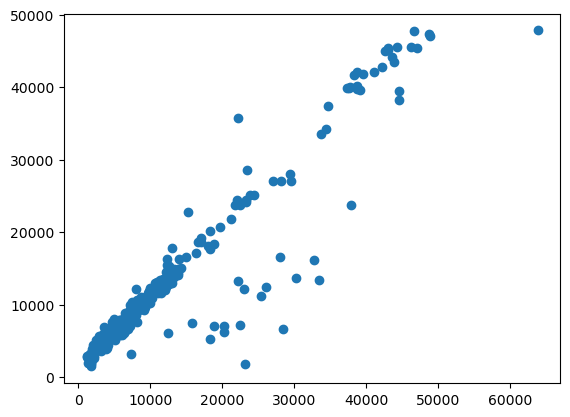

In [61]:
plt.scatter(y_test,y_test_pred4)
plt.show()

In [62]:
Residuals=y_test-y_test_pred4

In [64]:
import seaborn as sns

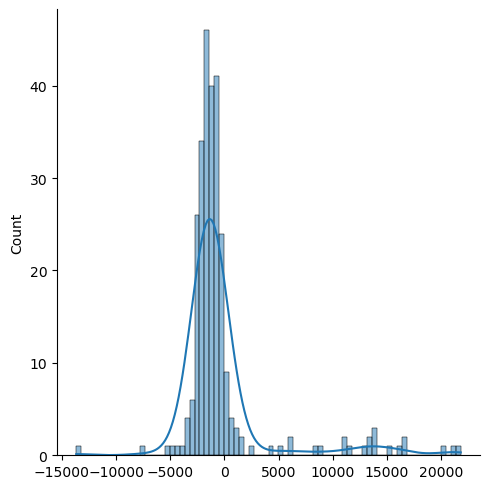

In [65]:
sns.displot(Residuals,kde=True)
plt.show()

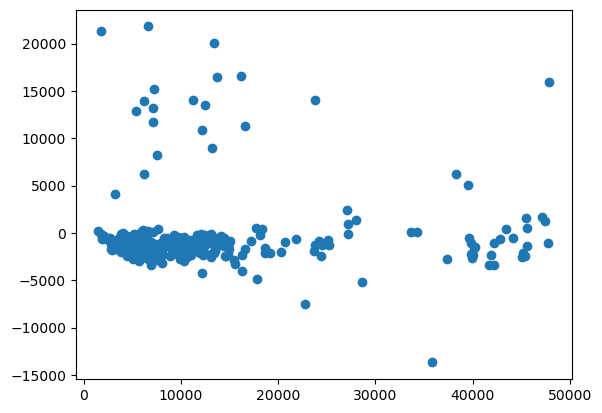

In [66]:
# for uniform distribution
plt.scatter(y_test_pred4,Residuals)
plt.show()